['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']


Text(0.5, 1.0, 'bior')

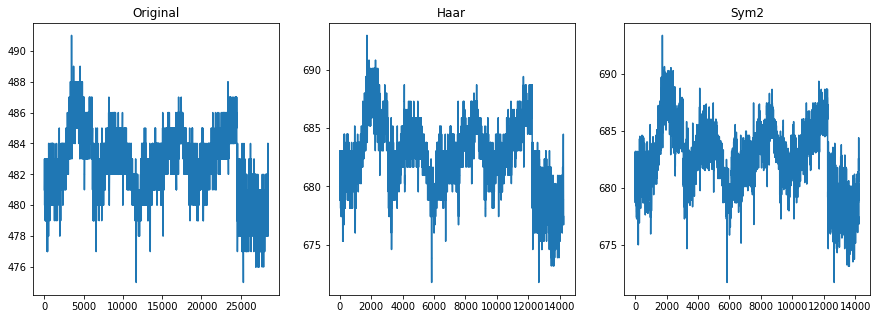

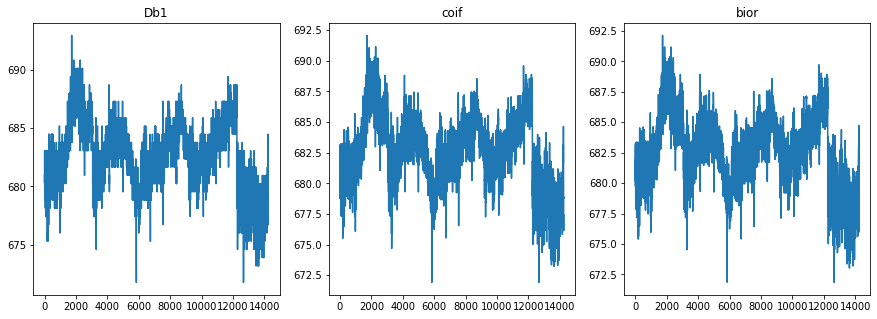

In [113]:
import os
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import pywt as wt
import data_loader


def get_frequencie(emg_data):
    result = np.fft.fft(emg_data, axis=0)
    print(result)
    plt.plot(result)
    plt.show()
    return result

def apply_butter_filter(emg_data, freq):
    butter_filter = signal.butter(2, freq, analog=True, output='sos')
    #result = np.fft.ifft(butter_filter * fft_freq[:,1])
    return signal.sosfilt(butter_filter, emg_data)


#folderpath = r"..\..\Acquisition\Data\Dataset_avec_angles_tester"
#emg_data, angle_data = data_loader.load_data(folderpath)
#get_frequencie(emg_data)

data = np.load("/Users/aramsevagavarian/Classification/Acquisition/Data/7_electrodes_Philippe/regroupement_des donnes_par_categorie/test_data_with_freestyle/shoulder_extension_3s_2000Hz.npy")
# #print(data.shape)
# result = apply_butter_filter(data, 10000)
# get_frequencie(result)
# plt.plot(result)

a = pywt.dwt(data[:,3],'haar')[0]
b = pywt.dwt(data[:,3],'sym2')[0]
c = pywt.dwt(data[:,3],'db1')[0]
d = pywt.dwt(data[:,3],'coif1')[0]
e = pywt.dwt(data[:,3],'bior6.8')[0]

#print(pywt.wavelist(kind='discrete'))

plt.rcParams["figure.figsize"] = (15, 5)
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.plot(data[:,3])
ax2.plot(a)
ax3.plot(b)
ax1.set_title('Original')
ax2.set_title('Haar')
ax3.set_title('Sym2')

plt.rcParams["figure.figsize"] = (15, 5)
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.plot(c)
ax2.plot(d)
ax3.plot(e)
ax1.set_title('Db1')
ax2.set_title('coif')
ax3.set_title('bior')
